In [ ]:
#

In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import keras.backend as K
import tensorflow as tf
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Cropped_Labelled_Images

/content/drive/MyDrive/Cropped_Labelled_Images


In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
#new_model.summary()

0
4


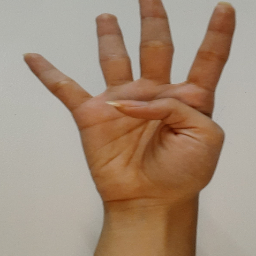

0
U


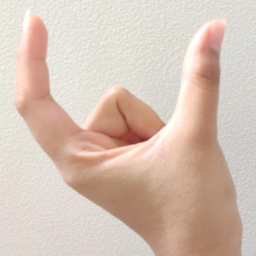

0
2


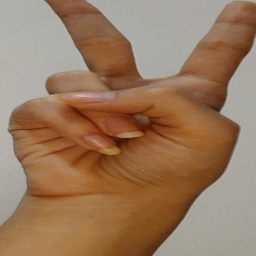

0
M


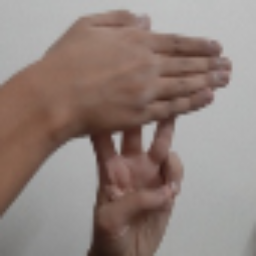

0
9


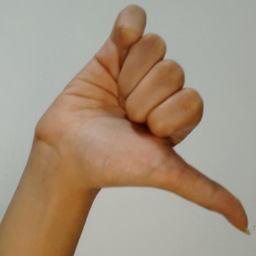

0
S


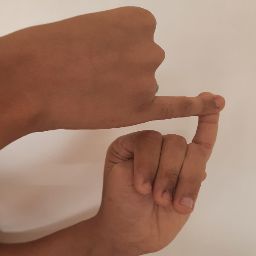

0
Z


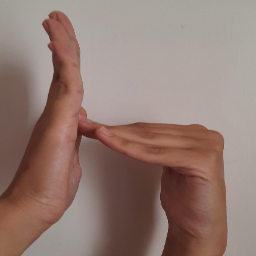

0
8


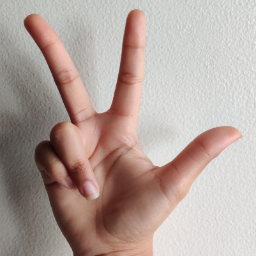

0
I


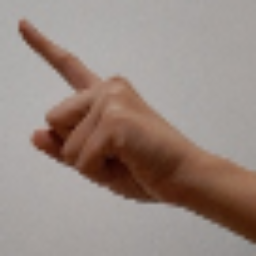

0
3


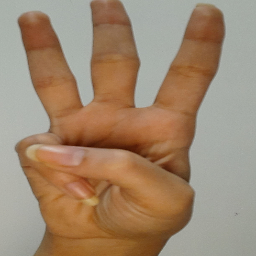

0
L


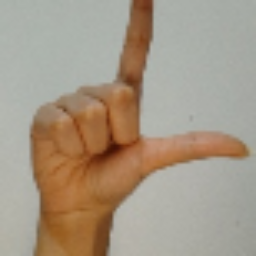

0
P


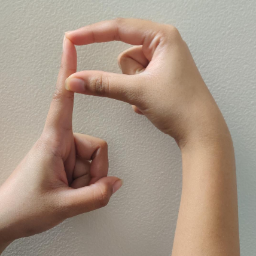

0
W


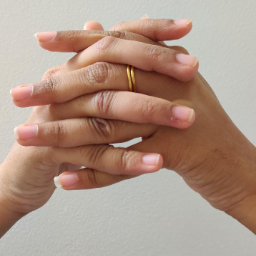

0
1


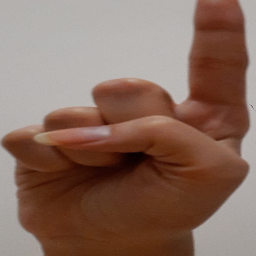

0
K


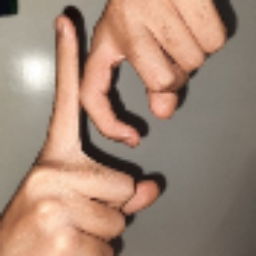

0
D


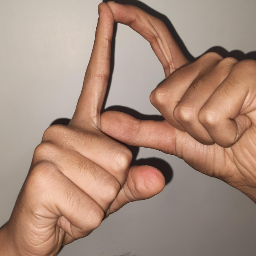

0
5


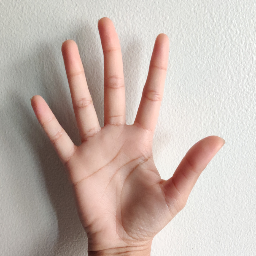

0
6


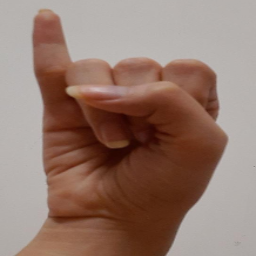

0
F


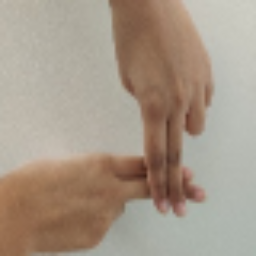

0
A


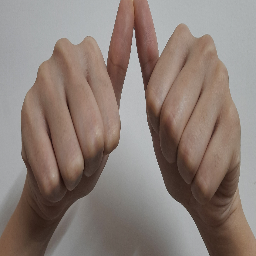

0
C


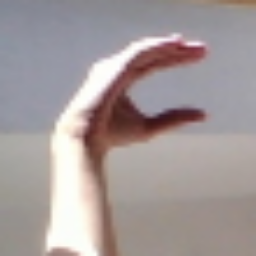

0
R


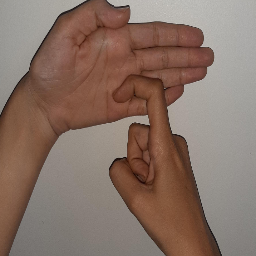

0
H


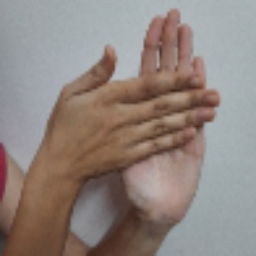

0
E


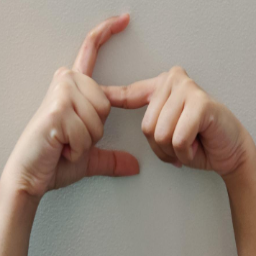

0
7


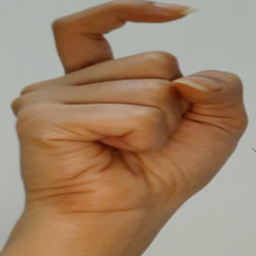

0
6


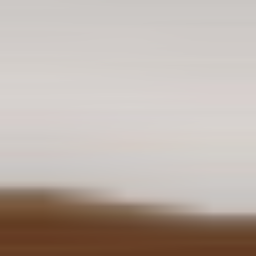

0
V


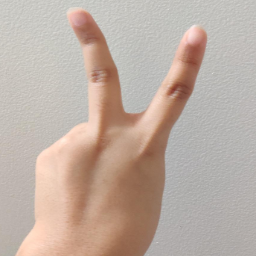

In [ ]:
import cv2
import os
import numpy as np
import glob
import random
from PIL import Image
from google.colab.patches import cv2_imshow
from skimage.transform import resize


# Load Yolo
#net = cv2.dnn.readNet("/content/drive/MyDrive/YOLOv3/yolov3_training_last.weights", "/content/drive/MyDrive/YOLOv3/yolov3_testing.cfg")
net = cv2.dnn.readNet("/content/drive/MyDrive/YOLOv4/yolov4_training_last.weights", "/content/drive/MyDrive/YOLOv4/yolov4_testing.cfg")

# Name custom object
classes = ["hand"]

# Images path
images_path = glob.glob(r"/content/drive/MyDrive/Cropped_Labelled_Images/test/*.jpg")
name ='\0'
k=1

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Insert here the path of your images
random.shuffle(images_path)
# loop through all the images
for img_path in images_path:
    # Loading image
    Fil = os.path.splitext(img_path)[0]
    j = str(k)
    name = Fil[26:27] + '_' + j +'.jpg'
    #print(name)
    k+=1
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:
                # Object detected
                print(class_id)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    #print(indexes)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            crop_img = img[y:y+h, x:x+w ]

            try:
                crop_img = cv2.resize(crop_img, (256,256))
                #cv2.imwrite(r"/content/drive/MyDrive/please_ffs/" + name , crop_img)
            except:
                print ('Caught KeyboardInterrupt')
            else:
                t =new_model.predict(crop_img.reshape(1, 256, 256, 3)).argmax()
                if t==0:
                    print('1')
                elif t==1:
                    print('A')
                elif t==2:
                    print('B')
                elif t==3:
                    print('C')
                elif t==4:
                    print('D')
                elif t==5:
                    print('E')
                elif t==6:
                    print('F')
                elif t==8:
                    print('H')
                elif t==9:
                    print('I')
                elif t==11:
                    print('2')
                elif t==12:
                    print('K')
                elif t==13:
                    print('L')
                elif t==14:
                    print('M')
                elif t==16:
                    print('O')
                elif t==17:
                    print('P')
                elif t==18:
                    print('Q')
                elif t==19:
                    print('R')
                elif t==20:
                    print('S')
                elif t==21:
                    print('T')
                elif t==22:
                    print('3')
                elif t==23:
                    print('U')
                elif t==24:
                    print('V')
                elif t==25:
                    print('W')
                elif t==26:
                    print('X')
                elif t==27:
                    print('Y')
                elif t==28:
                    print('Z')
                elif t==29:
                    print('4')
                elif t==30:
                    print('5')
                elif t==31:
                    print('6')
                elif t==32:
                    print('7')
                elif t==33:
                    print('8')
                elif t==34:
                    print('9')
                else:
                    print(t)

    label = str(classes[class_ids[i]])
    color = colors[class_ids[i]]
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    cv2.putText(img, label, (x, y + 30), font, 3, color, 2)

    try:
        cv2_imshow(crop_img)
        key = cv2.waitKey(0)
    except:
        print('ABC')

cv2.destroyAllWindows()